In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 566231040 bytes (576660654 bytes left) ...
 99% 1.06G/1.06G [00:07<00:00, 35.0MB/s]
100% 1.06G/1.06G [00:07<00:00, 74.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
#Import Essentail Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [7]:
#Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32 ,
    image_size = (256,256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32 ,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize

def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
#Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = "valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2 , padding="valid"))


model.add(Conv2D(64, kernel_size=(3,3), padding = "valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2 , padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding = "valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2 , padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Checking Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
#Compile

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5727 - loss: 2.2788 - val_accuracy: 0.6818 - val_loss: 0.6217
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6957 - loss: 0.5791 - val_accuracy: 0.7388 - val_loss: 0.5184
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.7587 - loss: 0.5048 - val_accuracy: 0.7420 - val_loss: 0.5023
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.8049 - loss: 0.4335 - val_accuracy: 0.7664 - val_loss: 0.4866
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.8371 - loss: 0.3700 - val_accuracy: 0.7972 - val_loss: 0.4651
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.8751 - loss: 0.2859 - val_accuracy: 0.7996 - val_loss: 0.6183
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 87ms/step - accuracy: 0.9170 - loss: 0.2073 - val_accuracy: 0.8130 - val_loss: 0.5642
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9457 - loss: 0.1416 -

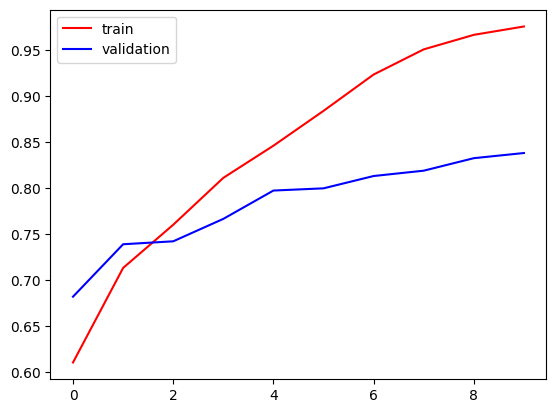

In [13]:
#Checking result be seeing accuracy to see our model performance

plt.plot(history.history['accuracy'],color="red",label="train")
plt.plot(history.history['val_accuracy'],color="blue",label="validation")
plt.legend()
plt.show()

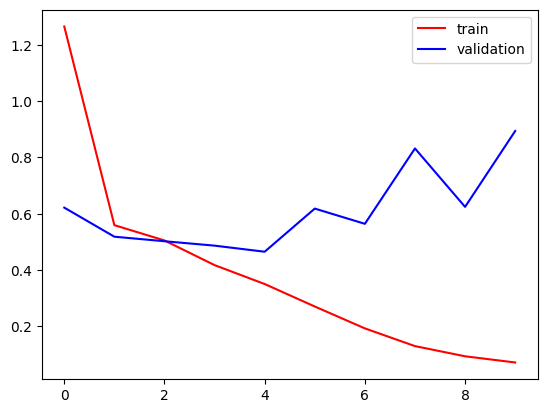

In [14]:

#Chceking by see loss in train and Validation_set
plt.plot(history.history['loss'],color="red",label="train")
plt.plot(history.history['val_loss'],color="blue",label="validation")
plt.legend()
plt.show()

In [31]:
#Test Some Images from Google

import cv2


In [32]:
test_image = cv2.imread("/content/dog.jpg")

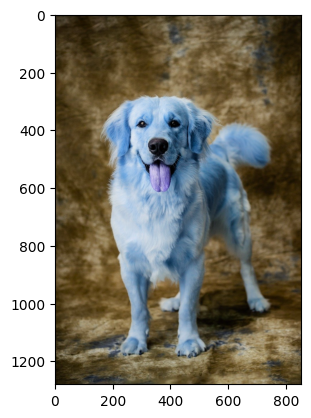

In [33]:
plt.imshow(test_image)


In [34]:
test_image.shape

(1280, 853, 3)

In [35]:
#Resize Image according to our model
test_image=cv2.resize(test_image,(256,256))

In [36]:
test_input = test_image.reshape((1,256,256,3))


In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.]], dtype=float32)